# 오버워치 2 점수판 분석 AI

In [1]:
import os
import pandas as pd

players = 10


def prepare_scoreboards(defeat_, draw_, victory_):
    scoreboards_ = pd.concat([defeat_, draw_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = os.path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
draw = pd.read_csv(datapath + 'draw.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, draw, victory)
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = scoreboards['D'].max()
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0   7   3   6   5933   1068   6199  DEFEAT
    1   7   0  10   3601    747      0  DEFEAT
    2   9   1   6   4352      0      0  DEFEAT
    3   7   7   2   2332   6325      0  DEFEAT
    4   6   4   2   3410   5979    606  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
249 5  34   9   7  15597   1508  15282  DEFEAT
    6  28   1  12  14064   1339    238  DEFEAT
    7  29   1  13  12145      0     48  DEFEAT
    8  11  26   9   2798  16190   1352  DEFEAT
    9   4  24   8    743  20730    176  DEFEAT

[2500 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2500 entries, (0, 0) to (249, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       2500 non-null   int64 
 1   A       2500 non-null   int64 
 2   D       2500 non-null   int64 
 3   DMG     2500 non-null   int64 
 4   H       2500 non-null   int64 
 5   MIT     2500 non-null   int64 
 6   GAME    2500 non-null   object
dtypes: int64(6), object(1)
memory usage: 154.5+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,14.008800,7.459600,6.619600,6291.723200,3898.748800,2326.210800
std,10.436297,8.806281,4.130584,4705.203181,5213.572767,4696.423124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2681.250000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5346.000000,799.500000,242.500000
75%,20.000000,12.000000,9.000000,9339.250000,7438.500000,1708.500000
max,56.000000,48.000000,21.000000,29354.000000,27756.000000,41092.000000


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = os.path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


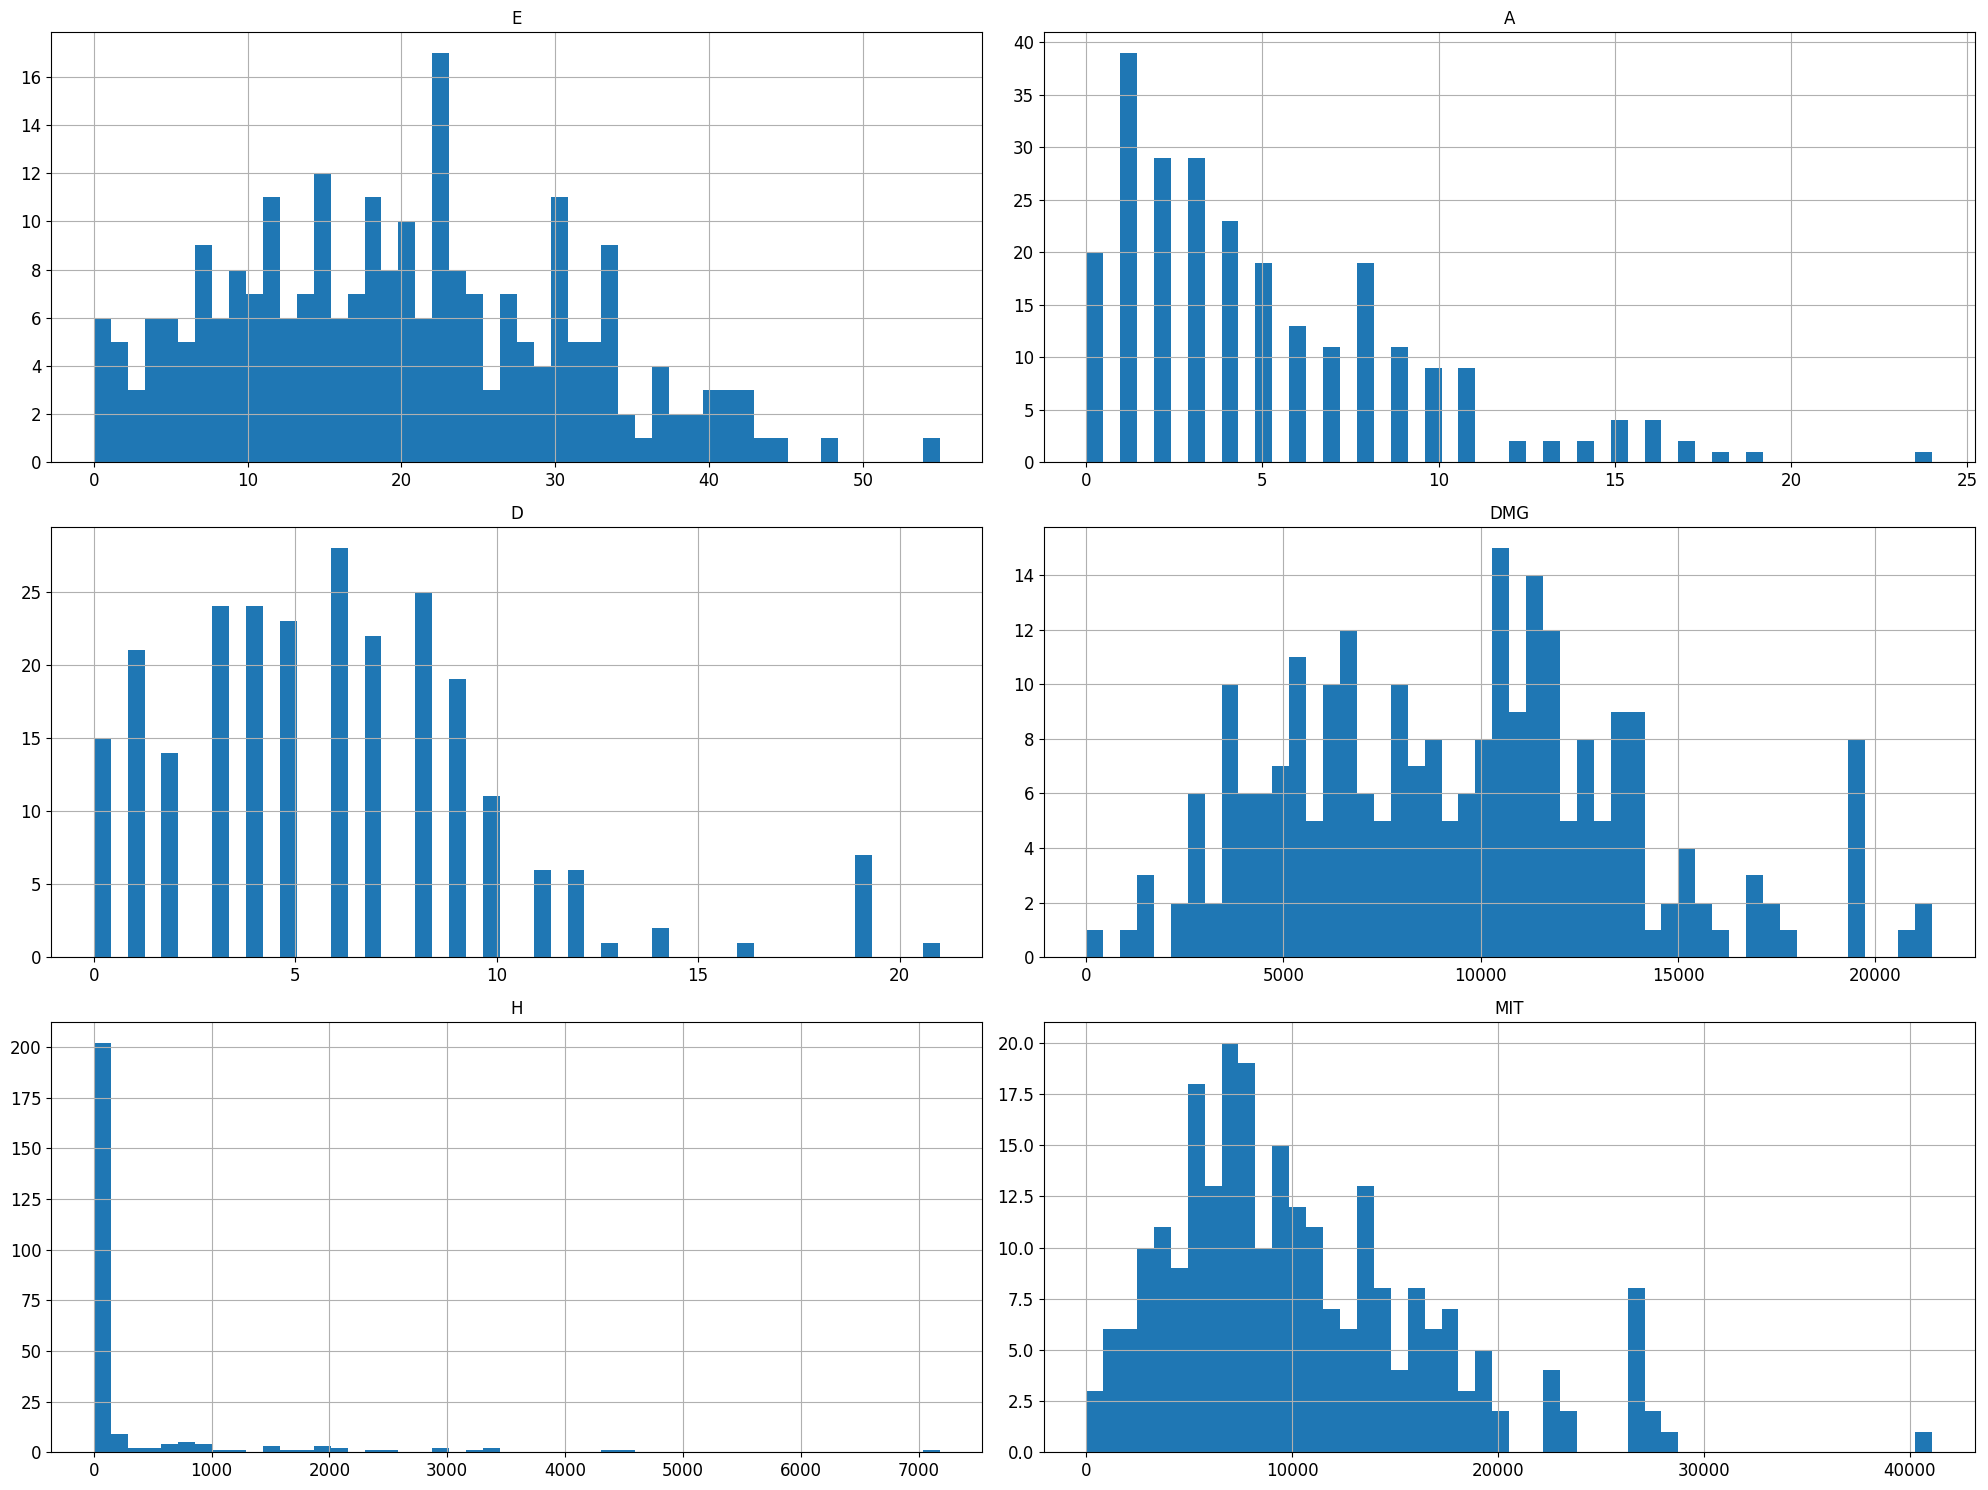

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


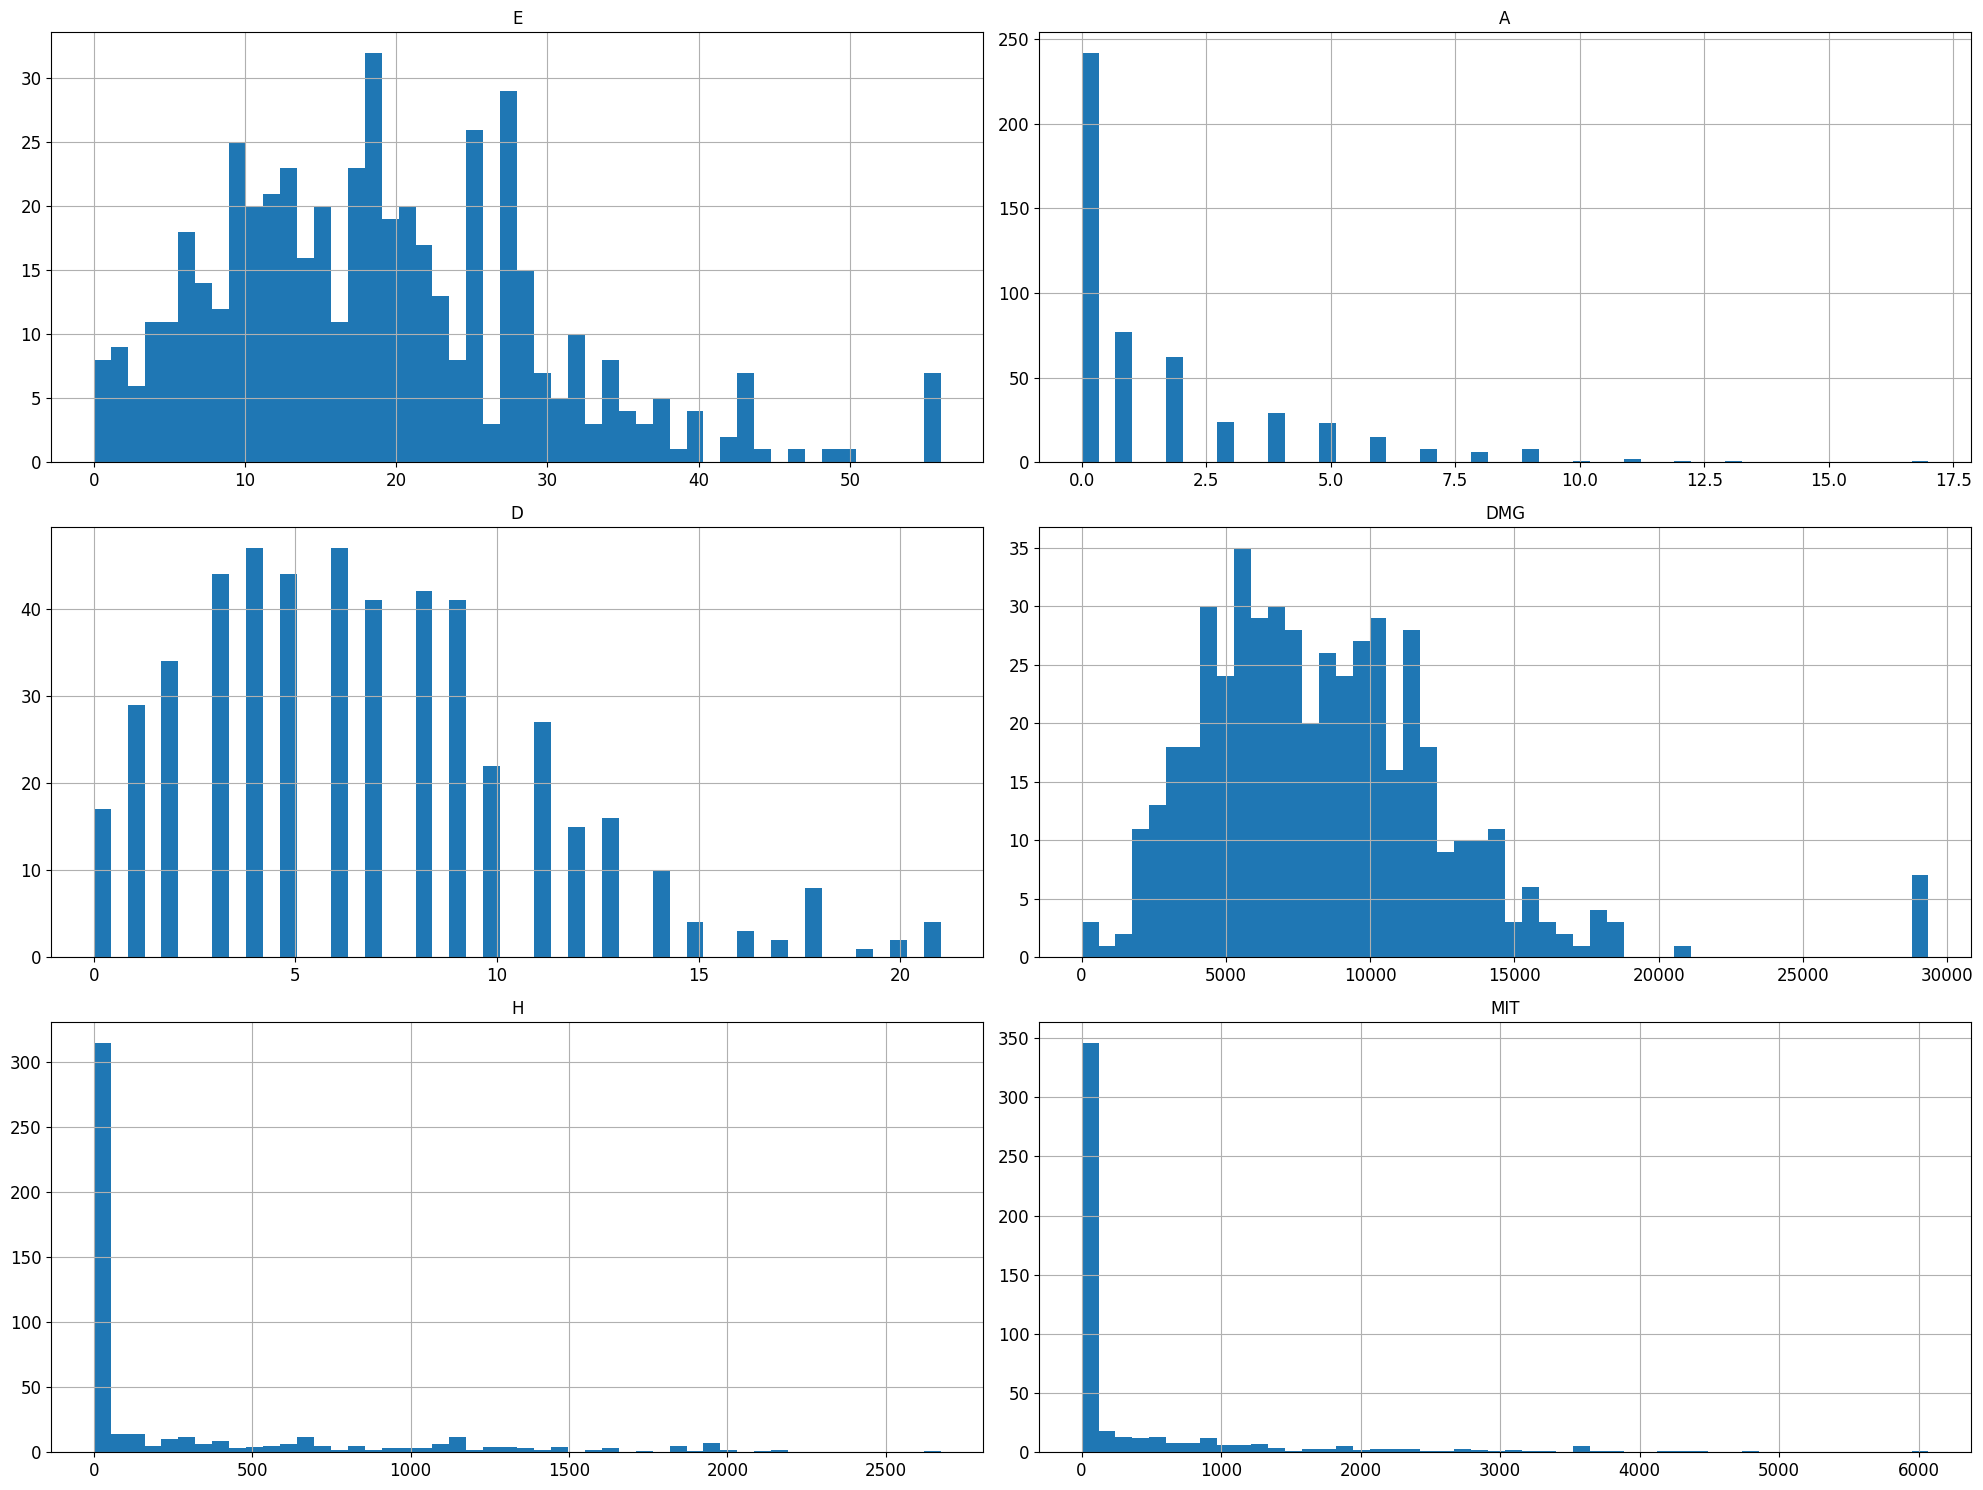

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


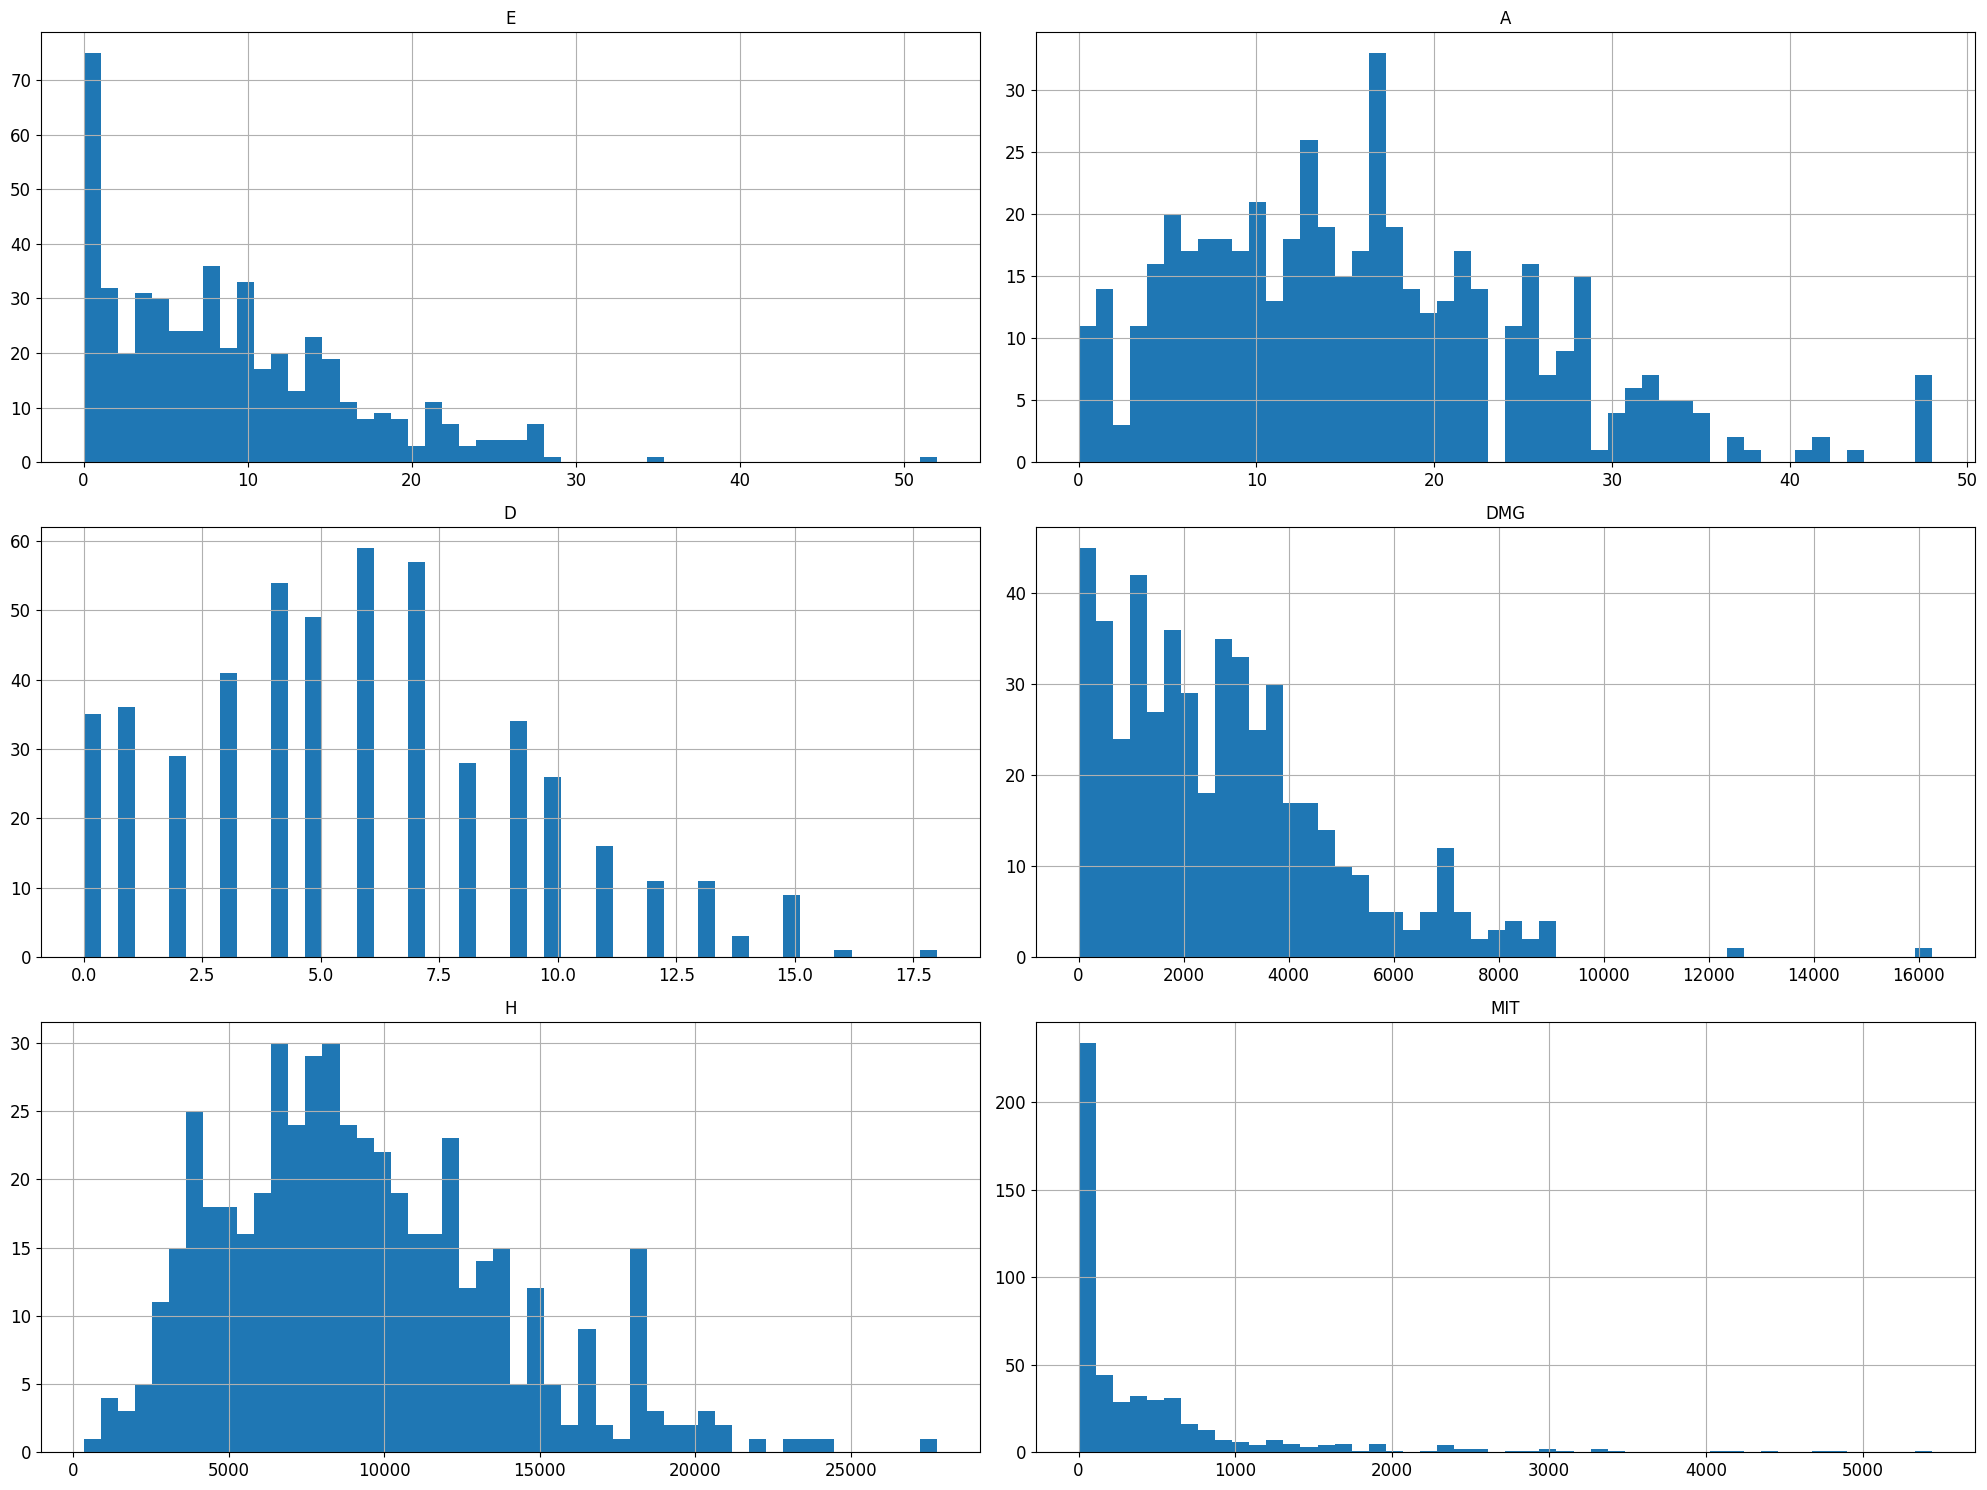

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn.utils import shuffle

index = scoreboards.index
train_set = scoreboards.loc[shuffle(range(len(index) // players))]
train_set

E   A   D    DMG      H    MIT     GAME
126 0   7   2   2   7838   4541   1318  VICTORY
    1  11   0   4   9162      0    570  VICTORY
    2  17   0   4   9152      0   2287  VICTORY
    3   6   9   1   2997   5168      0  VICTORY
    4   2  13   1    166   9094    330  VICTORY
...    ..  ..  ..    ...    ...    ...      ...
23  5  41  16  14  24682      0  25529  VICTORY
    6  45  12  11  19804   2748      0  VICTORY
    7  47   0  16  26666   2566    142  VICTORY
    8  19  44   9   6281  24081      0  VICTORY
    9  31  28   8   9749  14991    592  VICTORY

[2500 rows x 7 columns]

In [10]:
scoreboards = train_set.drop('GAME', axis=1)
scoreboards_labels = train_set['GAME'].copy()

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(scoreboards)
scoreboards_tr = pd.DataFrame(X, index, scoreboards.columns)
scoreboards_tr

E         A         D       DMG         H       MIT
0   0  0.125000  0.041667  0.095238  0.267016  0.163604  0.032074
    1  0.196429  0.000000  0.190476  0.312121  0.000000  0.013871
    2  0.303571  0.000000  0.190476  0.311780  0.000000  0.055656
    3  0.107143  0.187500  0.047619  0.102099  0.186194  0.000000
    4  0.035714  0.270833  0.047619  0.005655  0.327641  0.008031
...         ...       ...       ...       ...       ...       ...
249 5  0.732143  0.333333  0.666667  0.840839  0.000000  0.621264
    6  0.803571  0.250000  0.523810  0.674661  0.099006  0.000000
    7  0.839286  0.000000  0.761905  0.908428  0.092448  0.003456
    8  0.339286  0.916667  0.428571  0.213974  0.867596  0.000000
    9  0.553571  0.583333  0.380952  0.332118  0.540099  0.014407

[2500 rows x 6 columns]

In [12]:
features = X.shape[-1]
X = X.reshape(-1, players * features)
X

array([[0.125     , 0.04166667, 0.0952381 , ..., 0.00626831, 0.43583369,
        0.01148642],
       [0.08928571, 0.02083333, 0.28571429, ..., 0.08949377, 0.1978311 ,
        0.01036698],
       [0.125     , 0.04166667, 0.28571429, ..., 0.04742114, 0.18565355,
        0.03650346],
       ...,
       [0.55357143, 0.3125    , 0.23809524, ..., 0.17486544, 0.63247586,
        0.00732503],
       [0.17857143, 0.02083333, 0.38095238, ..., 0.05382571, 0.26923908,
        0.01099971],
       [0.75      , 0.33333333, 0.66666667, ..., 0.33211828, 0.54009944,
        0.0144067 ]])

In [13]:
scoreboards_tr[:10]

E         A         D       DMG         H       MIT
0 0  0.125000  0.041667  0.095238  0.267016  0.163604  0.032074
  1  0.196429  0.000000  0.190476  0.312121  0.000000  0.013871
  2  0.303571  0.000000  0.190476  0.311780  0.000000  0.055656
  3  0.107143  0.187500  0.047619  0.102099  0.186194  0.000000
  4  0.035714  0.270833  0.047619  0.005655  0.327641  0.008031
  5  0.089286  0.000000  0.190476  0.242454  0.000000  0.177042
  6  0.107143  0.020833  0.238095  0.266880  0.000000  0.000000
  7  0.125000  0.020833  0.285714  0.238741  0.000000  0.000000
  8  0.053571  0.083333  0.238095  0.078218  0.278138  0.010854
  9  0.000000  0.083333  0.142857  0.006268  0.435834  0.011486

In [14]:
X.shape

(250, 60)

In [15]:
y = scoreboards_labels[::players]
y

126  0    VICTORY
43   0     DEFEAT
62   0     DEFEAT
183  0    VICTORY
218  0    VICTORY
           ...   
51   0     DEFEAT
3    0     DEFEAT
27   0     DEFEAT
10   0     DEFEAT
23   0     DEFEAT
Name: GAME, Length: 250, dtype: object

In [16]:
y.shape

(250,)

In [17]:
from sklearn import ensemble, linear_model, neighbors, neural_network, svm, tree
from sklearn.model_selection import cross_val_score
from operator import itemgetter

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(max_iter=400, n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=400, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(2., n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=1600),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(nu=.0625),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=itemgetter(1), reverse=True)
scores

[(SVC(), 0.916),
 (LogisticRegression(max_iter=400, n_jobs=-1), 0.908),
 (ExtraTreesClassifier(n_jobs=-1), 0.9),
 (LogisticRegressionCV(max_iter=400, n_jobs=-1), 0.9),
 (RidgeClassifier(), 0.9),
 (RidgeClassifierCV(), 0.9),
 (SGDClassifier(n_jobs=-1), 0.9),
 (LinearSVC(dual='auto'), 0.9),
 (RandomForestClassifier(n_jobs=-1), 0.8880000000000001),
 (MLPClassifier(max_iter=1600), 0.8880000000000001),
 (NearestCentroid(), 0.884),
 (Perceptron(n_jobs=-1), 0.8800000000000001),
 (KNeighborsClassifier(n_jobs=-1), 0.8800000000000001),
 (NuSVC(nu=0.0625), 0.8800000000000001),
 (GradientBoostingClassifier(), 0.876),
 (HistGradientBoostingClassifier(), 0.876),
 (BaggingClassifier(n_jobs=-1), 0.8640000000000001),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8560000000000001),
 (DecisionTreeClassifier(), 0.808),
 (ExtraTreeClassifier(), 0.76),
 (RadiusNeighborsClassifier(n_jobs=-1, radius=2.0), 0.6399999999999999),
 (AdaBoostClassifier(), 0.632)]

In [18]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)

        tanks = importances[[0, 5]]
        damages = importances[[1, 2, 6, 7]]
        supports = importances[[3, 4, 8, 9]]

        items = '돌격 1인', '공격 1인', '지원 1인'

        print('\n**역할 중요도**')
        roles = tanks.sum(), damages.sum() / 2, supports.sum() / 2
        for s, f in sorted(zip(roles, items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        items = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for s, f in sorted(zip(importances.sum(0), items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')
        
        print('\n**돌격 1인 특성 중요도**')
        for s, f in sorted(zip(tanks.sum(0), items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        print('\n**공격 1인 특성 중요도**')
        for s, f in sorted(zip(damages.sum(0) / 2, items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        print('\n**지원 1인 특성 중요도**')
        for s, f in sorted(zip(supports.sum(0) / 2, items), reverse=True):
            print(f'{f}: {s * 100:.0f}%')

        break

ExtraTreesClassifier(n_jobs=-1)

**역할 중요도**
돌격 1인: 28%
지원 1인: 18%
공격 1인: 18%

**특성 중요도**
처치: 29%
죽음: 27%
도움: 19%
피해: 10%
치유: 8%
경감: 6%

**돌격 1인 특성 중요도**
처치: 10%
죽음: 9%
도움: 4%
피해: 3%
경감: 1%
치유: 1%

**공격 1인 특성 중요도**
처치: 7%
죽음: 4%
피해: 2%
치유: 2%
도움: 1%
경감: 1%

**지원 1인 특성 중요도**
도움: 6%
죽음: 5%
처치: 3%
치유: 2%
피해: 2%
경감: 1%


In [38]:
i = 2
scoreboard = scoreboards[i * 10:i * 10 + 10]
print(scoreboard.index[0][0] + 1)
print(scoreboard.index[0][0] - len(defeat) // players - len(draw) // players + 1)
scoreboard

63
-63


E   A  D   DMG     H    MIT
62 0   7   2  6  6671     0   6965
   1   8   0  3  3519     0      0
   2   8   1  7  3840    13      0
   3   4   4  6  1228  6054   1280
   4   1   6  8  1298  4741      0
   5  13   1  4  4068     0  10024
   6  18   0  3  4216   896      0
   7  20   0  2  7129   282      0
   8  19  15  2  4447  5509      0
   9   7   9  2  1392  5153   1500

In [39]:
import numpy as np

In [40]:
team = X[i].reshape(players, features)[:5].copy()
team[:, 2] = 1 - team[:, 2]
team[0] *= tanks.sum(0)
team[1:3] *= damages.sum(0)
team[3:] *= supports.sum(0)
contribution = team / team.sum() * 100
np.round(contribution.sum(1))

array([19., 23., 19., 21., 19.])

In [41]:
team = X[i].reshape(players, features)[5:].copy()
team[:, 2] = 1 - team[:, 2]
team[0] *= tanks.sum(0)
team[1:3] *= damages.sum(0)
team[3:] *= supports.sum(0)
contribution = team / team.sum() * 100
np.round(contribution.sum(1))

array([15., 19., 21., 24., 19.])

5개 투표가 제일 좋다.

In [ ]:
classifiers = []
for i in range(3, len(scores)):
    classifiers.append((i, cross_val_score(ensemble.VotingClassifier([(str(j), scores[j][0]) for j in range(i)], n_jobs=-1), X, y, n_jobs=-1).mean()))
classifiers.sort(key=itemgetter(1), reverse=True)
classifiers

In [ ]:
estimator = ensemble.StackingClassifier([(str(i), scores[i][1]) for i in range(2)], scores[0][1], n_jobs=-1).fit(X, y)
estimator.score(X_test, y_test)

In [ ]:
model = scores[0][1]
for i, (y_true, y_pred) in enumerate(zip(y_test.values, model.predict(X_test))):
    if y_true != y_pred:
        i = y_test.index[i][0]
        defeats = len(defeat) // players
        sum_ = defeats + len(draw) // players
        next_ = i + 1
        if i < defeats:
            print(f'{y_true} ({next_}) -> {y_pred} ({i})')
        elif i < sum_:
            print(f'{y_true} ({next_ - defeats}) -> {y_pred} ({i})')
        else:
            print(f'{y_true} ({next_ - sum_}) -> {y_pred} ({i})')
        print(test.loc[i], end='\n\n')